# Milestone 2 - Matthew Currie
## Analyzing Health and Costs using the Medical_Cost dataset provided by UCI

In [1]:
# Relative Importing of Data
import sys
sys.path.append("..")
from project_functions import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../../data/raw/Medical_Cost.csv"

### Analyzing the Health and Medical Costs of Men with children v. Men without children

We want to create two data frames for comparison: `with_children` and `without_children`. But first, let's set some parameters for the men we want to compare as to narrow down potential variables.

 - Everyone should be in the age range of 25 to 50 (inclusive).
   - This is to limit how much of a factor age is in our comparison
 - Everyone should not be a smoker
   - This is to prevent any smoking related health differences from efffecting our comparison
   
Since the fields `sex` and `smoker` are going to be the same for everyone, we can drop these two fields from our DataFrame.

In [7]:
params = {
    'is_male' : True,
    'older_than' : 24,
    'younger_than' : 51,
    'no_smokers' : True,
    'reset_index' : True,
    'drop' : ['sex', 'smoker']
}

with_children = load_data(
    DATA_PATH,
    has_children=True,
    **params
)

no_children = load_data(
    DATA_PATH,
    has_children=False,
    **params
)

print("Sample of Men with Children")
print(len(with_children.index))
print('--------------------------------------------------')
print("Sample of Men without Children")
print(no_children.sample(5))

Sample of Men with Children
     age    bmi  children     region    charges
88    37  24.32         2  northwest  6198.7518
62    33  29.40         4  southwest  6059.1730
106   39  32.34         2  southeast  6338.0756
145   44  27.40         2  southwest  7726.8540
158   45  20.35         3  southeast  8605.3615
201
--------------------------------------------------
Sample of Men without Children
    age     bmi  children     region      charges
36   37  36.190         0  southeast  19214.70553
28   34  34.210         0  southeast   3935.17990
29   34  35.815         0  northwest   4320.41085
6    26  35.420         0  southeast   2322.62180
0    25  25.740         0  southeast   2137.65360
67


### Analyzing the distribution of the data

Let's plot the count of the ages on a graph to make sure their distributions are close enough to validly compare.

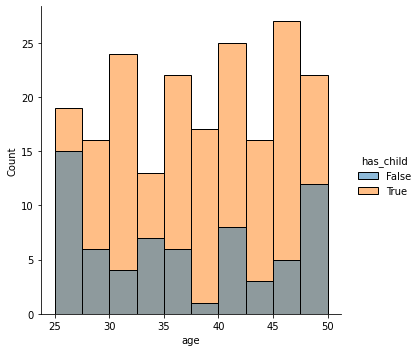

In [6]:
data = with_children[['age', 'children']].append(no_children[['age', 'children']])
data['has_child'] = data['children'] > 0

ax = sns.displot(data, x='age', hue='has_child')

### O no! It seems like there is not enough data about men without children to come to any firm conclusions.

Looks like we will have to free up our memory and start ananlyzing something else.
<!-- I spent so long on this plot it really makes me kind of sad that I don't have the data to do this analysis -->

In [8]:
# Free up memory to help with Python's performance
import gc

del with_children
del no_children
del data
gc.collect()

151